In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from math import sqrt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,Date,Export
0,2013-01,12263324.26
1,2013-02,13155175.59
2,2013-03,14066303.61
3,2013-04,13450014.59
4,2013-05,14141542.93
...,...,...
121,2023-02,18581601.22
122,2023-03,23585599.39
123,2023-04,19285695.16
124,2023-05,21648354.06


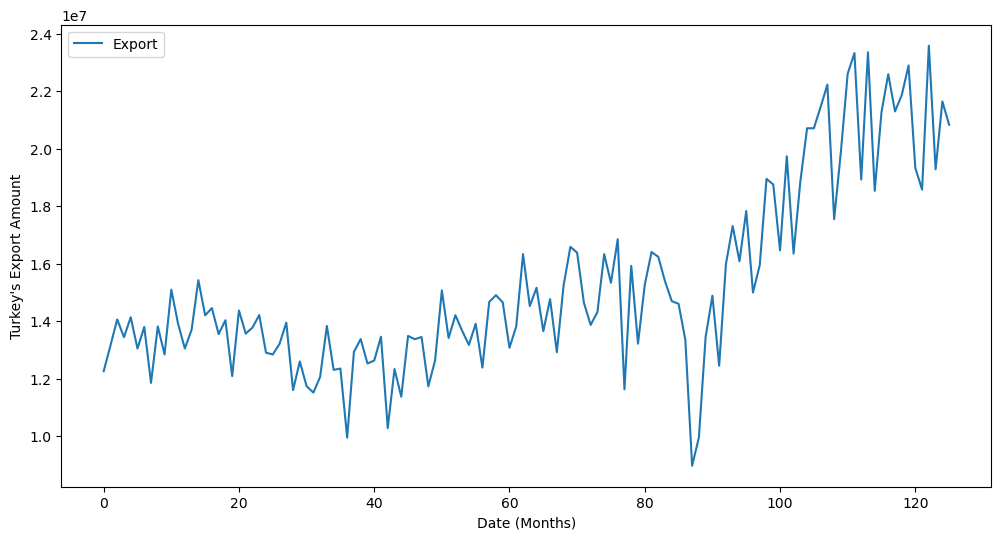

In [4]:
plt.figure(figsize=(12, 6))
df["Export"].plot()
plt.xlabel('Date (Months)')
plt.ylabel("Turkey's Export Amount")
plt.legend()
plt.show()

# Outlier Detection

In [5]:
import pandas as pd
import numpy as np


# İstatistiksel özetleme
summary = df.describe()

# Q1 ve Q3'ü bulma
Q1 = summary.at['25%', 'Export']
Q3 = summary.at['75%', 'Export']

# IQR (Interquartile Range) hesaplama
IQR = Q3 - Q1

# Alt ve üst sınırı belirleme
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Outlier'ları filtreleme
filtered_df = df[(df['Export'] >= lower_limit) & (df['Export'] <= upper_limit)]

# Sonuçları gösterme
print("Original DataFrame:")
print(df)
print("\nDataFrame without outliers:")
print(filtered_df)


Original DataFrame:
        Date       Export
0    2013-01  12263324.26
1    2013-02  13155175.59
2    2013-03  14066303.61
3    2013-04  13450014.59
4    2013-05  14141542.93
..       ...          ...
121  2023-02  18581601.22
122  2023-03  23585599.39
123  2023-04  19285695.16
124  2023-05  21648354.06
125  2023-06  20837044.75

[126 rows x 2 columns]

DataFrame without outliers:
        Date       Export
0    2013-01  12263324.26
1    2013-02  13155175.59
2    2013-03  14066303.61
3    2013-04  13450014.59
4    2013-05  14141542.93
..       ...          ...
114  2022-07  18536547.53
120  2023-01  19336135.79
121  2023-02  18581601.22
123  2023-04  19285695.16
125  2023-06  20837044.75

[114 rows x 2 columns]


In [6]:
df = filtered_df

In [7]:
df

,Date,Export
0,2013-01,12263324.26
1,2013-02,13155175.59
2,2013-03,14066303.61
3,2013-04,13450014.59
4,2013-05,14141542.93
...,...,...
114,2022-07,18536547.53
120,2023-01,19336135.79
121,2023-02,18581601.22
123,2023-04,19285695.16


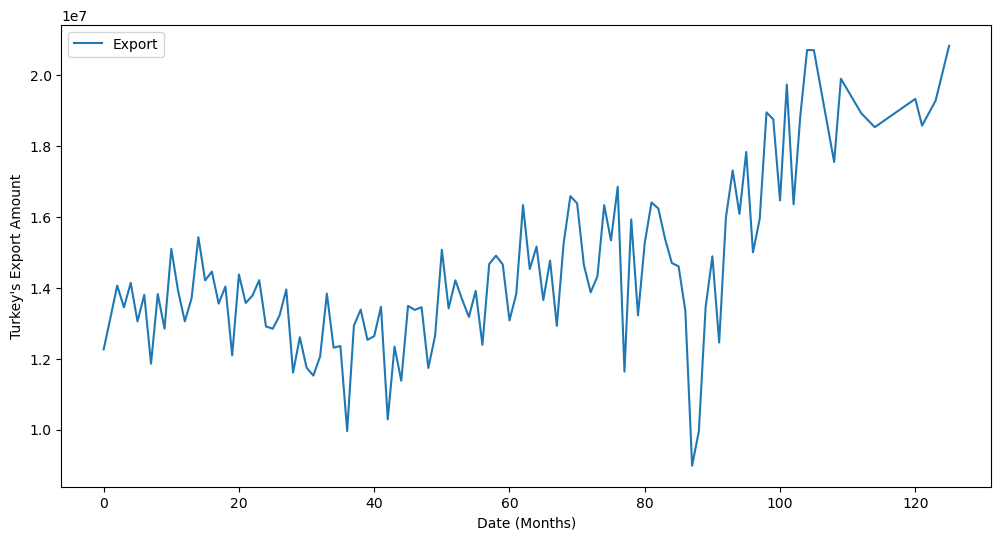

In [ ]:
plt.figure(figsize=(12, 6))
df["Export"].plot()
plt.xlabel('Date (Months)')
plt.ylabel("Turkey's Export Amount")
plt.legend()
plt.show()

# Trend & Seasonality

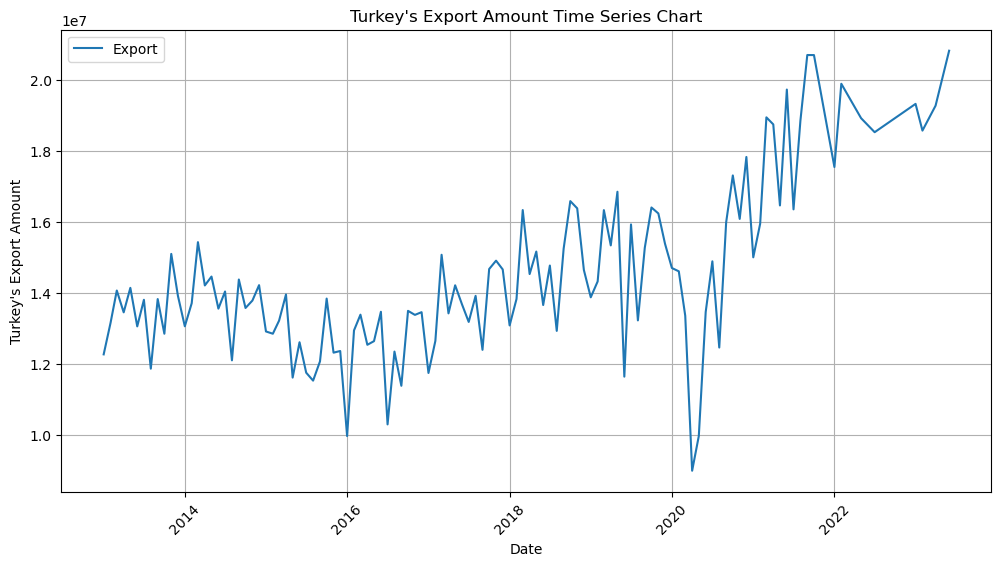

<Figure size 1200x600 with 0 Axes>

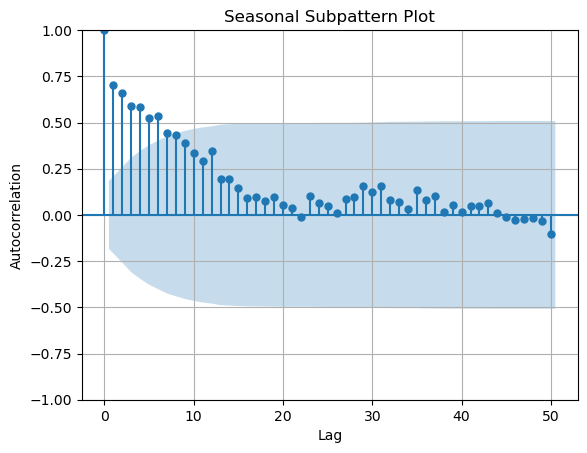

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# Mevsimsellik analizi için zaman serisi grafiği çizdirme
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Export"], label="Export")
plt.xlabel("Date")
plt.ylabel("Turkey's Export Amount")
plt.title("Turkey's Export Amount Time Series Chart")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Mevsimsel alt örüntü grafiği çizdirme
plt.figure(figsize=(12, 6))
plot_acf(df["Export"], lags=50, alpha=0.05)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Seasonal Subpattern Plot")
plt.grid(True)
plt.show()


The data has a seasonal structure.
Seasonality, 1 repeats in periods.


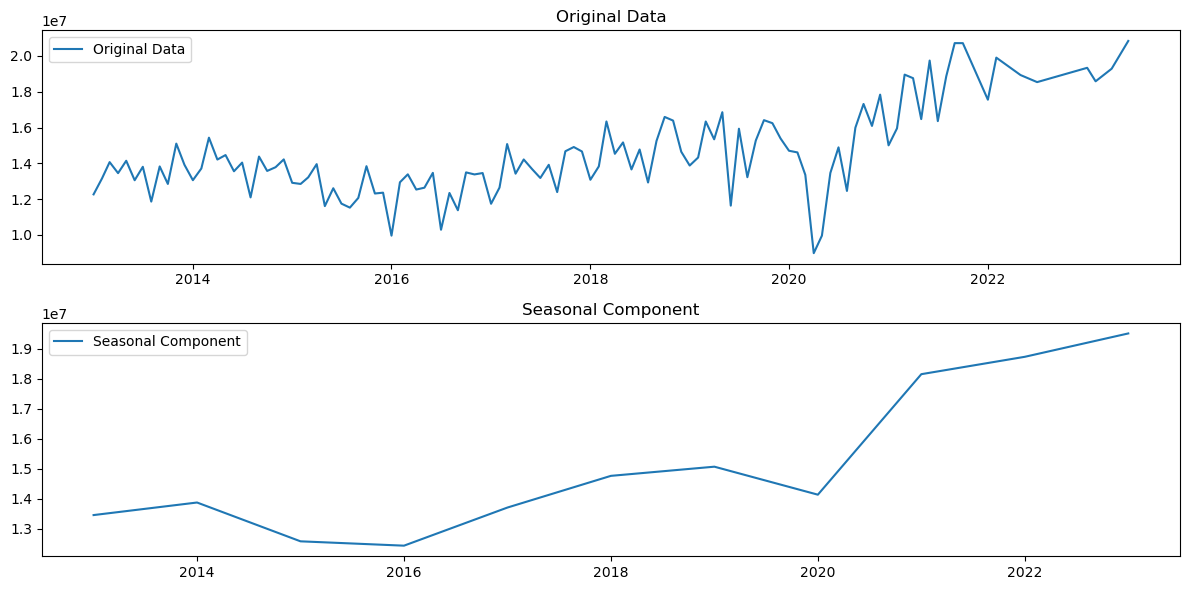

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def seasonal_test(data):
    ts = pd.Series(data['Export'].values, index=pd.to_datetime(data['Date']))
    freq = 12 if ts.index.freqstr == 'M' else 1
    result = sm.tsa.seasonal_decompose(ts, period=freq)
    seasonal_component = result.seasonal
    is_seasonal = not np.all(seasonal_component.isnull())
    return is_seasonal, seasonal_component, freq

is_seasonal, seasonal_component, freq = seasonal_test(df)

if is_seasonal:
    print("The data has a seasonal structure.")
    print(f"Seasonality, {freq} repeats in periods.")
else:
    print("The data has not a seasonal structure.")


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Export'], label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Data')

plt.subplot(2, 1, 2)
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = df.groupby(df['Date'].dt.year)['Export'].mean()
plt.plot(grouped_data.index, grouped_data.values, label='Seasonal Component')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.tight_layout()
plt.show()


# Moving Average

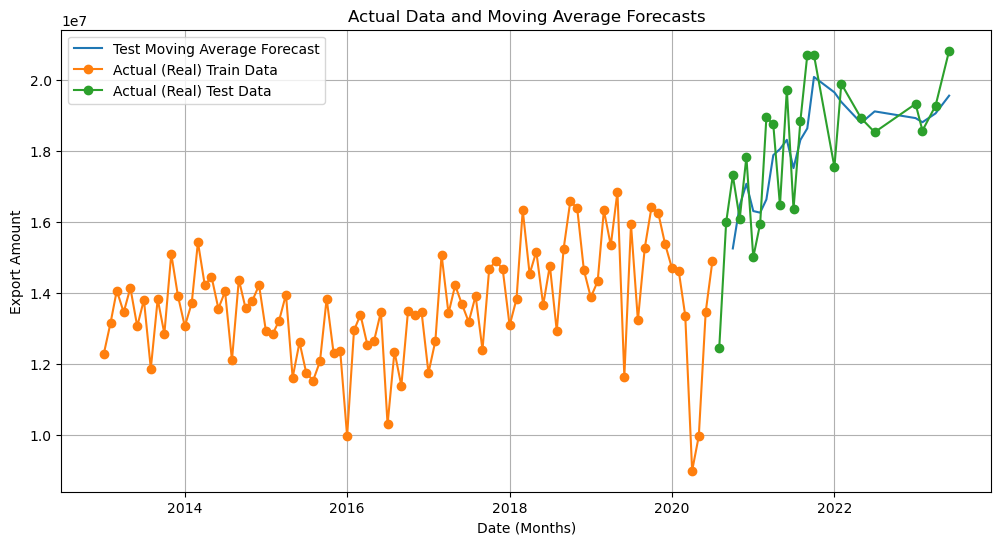

Optimal n value: 3
Train MSE: 985103680945.8337
Test MSE: 1461996954606.101
Train RMSE: 992523.8943954114
Test RMSE: 1209130.6606839895
Train MAE: 732156.1392509363
Test MAE: 993884.7709523812
Train MAPE: 0.05567415143687691
Test MAPE: 0.054695266171048904


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Verileri train ve test olarak ayırma
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Optimal n değerini ve hareketli ortalama değerini bulan fonksiyon
def find_optimal_n_moving_average(data_series):
    best_mse = float('inf')
    optimal_n = None
    best_ma = None
    for n in range(3, int(len(data_series) / 2 + 1)):
        mean_for_n = np.convolve(data_series, np.ones(n)/n, mode='valid')
        mse = mean_squared_error(data_series[n-1:], mean_for_n)
        if mse < best_mse:
            best_mse = mse
            optimal_n = n
            best_ma = np.mean(mean_for_n)
    return optimal_n, best_ma, best_mse

# Optimal n değerini bulma (train verileri üzerinde)
optimal_n, best_ma, train_mse = find_optimal_n_moving_average(train['Export'].values)

# Hareketli ortalama tahminlemesi (train ve test verileri üzerinde)
train_moving_average = np.convolve(train['Export'], np.ones(optimal_n)/optimal_n, mode='valid')
test_moving_average = np.convolve(test['Export'], np.ones(optimal_n)/optimal_n, mode='valid')

# Hata metriklerini hesapla
train_mae = mean_absolute_error(train['Export'][optimal_n-1:], train_moving_average)
test_mae = mean_absolute_error(test['Export'][optimal_n-1:], test_moving_average)

train_mape = mean_absolute_percentage_error(train['Export'][optimal_n-1:], train_moving_average)
test_mape = mean_absolute_percentage_error(test['Export'][optimal_n-1:], test_moving_average)

train_r2 = r2_score(train['Export'][optimal_n-1:], train_moving_average)
test_r2 = r2_score(test['Export'][optimal_n-1:], test_moving_average)

# MAD hesaplaması
train_mad = np.mean(np.abs(train['Export'][optimal_n-1:] - train_moving_average))

# MSE ve RMSE hesaplamaları
train_mse = mean_squared_error(train['Export'][optimal_n-1:], train_moving_average)
test_mse = mean_squared_error(test['Export'][optimal_n-1:], test_moving_average)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Grafik çizdirme
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
#plt.plot(train['Date'][optimal_n-1:], train_moving_average, label='Train Moving Average Forecast')
plt.plot(test['Date'][optimal_n-1:], test_moving_average, label='Test Moving Average Forecast')
plt.plot(train['Date'], train['Export'], label='Actual (Real) Train Data', marker='o')
plt.plot(test['Date'], test['Export'], label='Actual (Real) Test Data', marker='o')
plt.xlabel('Date (Months)')
plt.ylabel('Export Amount')
plt.title('Actual Data and Moving Average Forecasts')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal n value:", optimal_n)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)



In [ ]:
test

,Date,Export
91,2020-08-01,12456453.47
92,2020-09-01,15990797.71
93,2020-10-01,17315266.20
94,2020-11-01,16088682.23
95,2020-12-01,17837134.74
96,2021-01-01,15003935.22
97,2021-02-01,15952528.86
98,2021-03-01,18955706.12
99,2021-04-01,18756865.08
100,2021-05-01,16468343.40


In [ ]:
test_moving_average

array([15254172.46      , 16464915.38      , 17080361.05666666,
       16309917.39666667, 16264532.94      , 16637390.06666667,
       17888366.68666667, 18060304.86666667, 18321878.49666667,
       17522156.20666667, 18319700.53333333, 18644745.89      ,
       20096841.24666667, 19661097.47666667, 19390686.82333333,
       18796629.27333333, 19124230.09333333, 18934831.65      ,
       18818094.84666666, 19067810.72333333, 19568113.71      ])

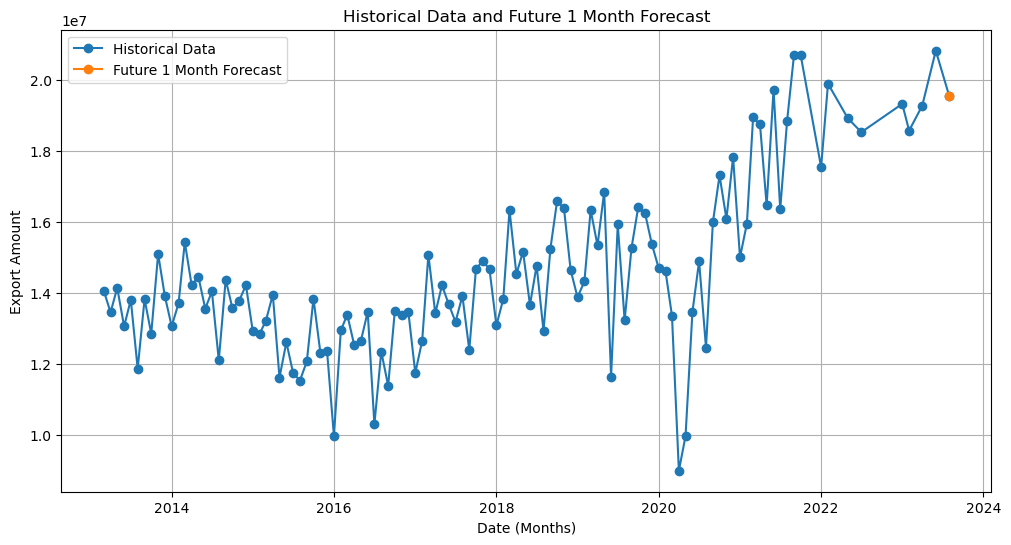

3
        Date       Export
0 2023-07-31  19568113.71


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Optimal_n değerini ayarlayın (örnek olarak 3 kullanalım)
optimal_n = 3

# Mevcut veri çerçevesinin son tarihini belirleyin
last_date = df['Date'].max()

# Gelecekteki 1 ayın tarih aralığını oluşturun
future_dates = pd.date_range(start=last_date, periods=2, freq='M')[1:]

# Gelecekteki 1 ayın tahminlemesi için hareketli ortalama hesaplayın
future_forecasts = np.convolve(df['Export'], np.ones(optimal_n)/optimal_n, mode='valid')

# Gelecekteki 1 ayın tahminlemelerini future_dates ile eşleştirin
future_forecasts_df = pd.DataFrame({'Date': future_dates, 'Export': future_forecasts[-1:]})

# Tahminlemeleri mevcut veri çerçevesine ekleyerek birleştirin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.plot(df['Date'][optimal_n-1:], df['Export'][optimal_n-1:], label='Historical Data', marker='o')
plt.plot(future_dates, future_forecasts[-1:], label='Future 1 Month Forecast', marker='o')
plt.xlabel('Date (Months)')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast')
plt.legend()
plt.grid(True)
plt.show()

print(optimal_n)
print(future_forecasts_df)


# Exponential Smoothing

In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

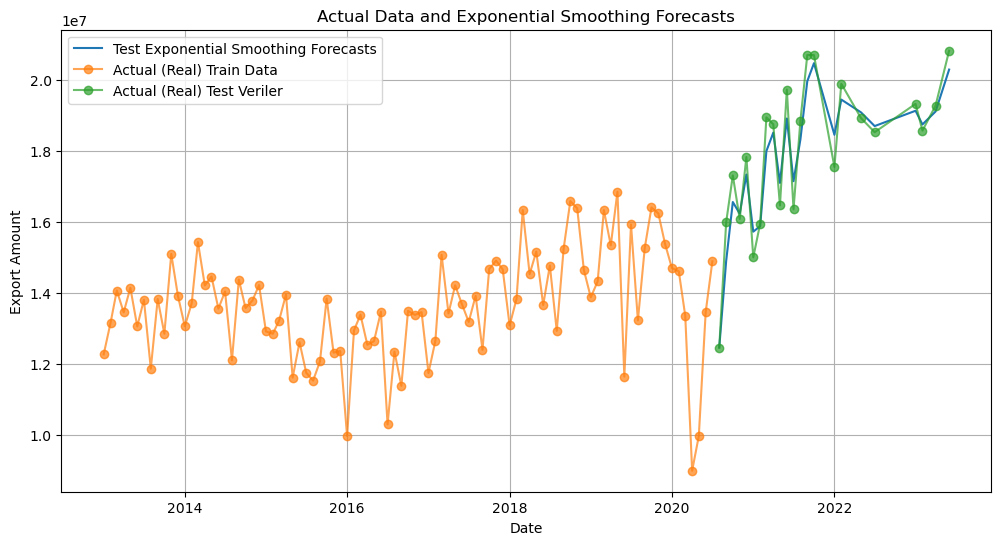

Optimal alpha değeri: 0.6900000000000001
Train MSE değeri: 210520632734.07285
Train MAE değeri: 353170.87117416586
Train MAPE değeri: 0.026833627353054904
Train RMSE değeri: 458825.27473328327
Test MSE değeri: 329019161315.4507
Test MAE değeri: 477054.71199975145
Test MAPE değeri: 0.026664139757407977
Test RMSE değeri: 573601.9188561442


In [ ]:
def exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]  # Başlangıç değeri ilk veri noktasıyla aynı
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed_data[-1]
        smoothed_data.append(smoothed_value)
    return smoothed_data



# Optimal alpha değerini ve üssel düzeltme sonuçlarını bulmak için fonksiyon
def find_optimal_alpha_exponential_smoothing(data_series):
    best_mad = float('inf')
    best_alpha = None
    best_result = None
    for alpha in np.arange(0, 0.7, 0.01):
        smoothed_data = exponential_smoothing(data_series, alpha)
        diff = np.array(data_series) - np.array(smoothed_data)
        mad = np.mean(np.abs(diff))
        if mad < best_mad:
            best_mad = mad
            best_alpha = alpha
            best_result = smoothed_data
    return best_alpha, best_result, best_mad

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Verileri train ve test olarak ayırma
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# Optimal alpha değerini ve üssel düzeltme sonuçlarını bulma (train verileri üzerinde)
optimal_alpha, exponential_smoothed_train, train_mad = find_optimal_alpha_exponential_smoothing(train['Export'].values)

# Üssel düzeltme tahminlemesi (train ve test verileri üzerinde)
exponential_smoothed_test = exponential_smoothing(test['Export'].values, optimal_alpha)

# Grafik çizdirme
plt.figure(figsize=(12, 6))
#plt.plot(train['Date'], exponential_smoothed_train, label='Train Exponential Smoothing Forecasts')
plt.plot(test['Date'], exponential_smoothed_test, label='Test Exponential Smoothing Forecasts')
plt.plot(train['Date'], train['Export'], label='Actual (Real) Train Data', marker='o', alpha=0.7)
plt.plot(test['Date'], test['Export'], label='Actual (Real) Test Veriler', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Actual Data and Exponential Smoothing Forecasts')
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train verileri için hata hesaplamaları
train_mse = mean_squared_error(train['Export'], exponential_smoothed_train)
train_mae = mean_absolute_error(train['Export'], exponential_smoothed_train)
train_mape = np.mean(np.abs((train['Export'] - exponential_smoothed_train) / train['Export']))
train_rmse = np.sqrt(train_mse)

# Test verileri için hata hesaplamaları
test_mse = mean_squared_error(test['Export'], exponential_smoothed_test)
test_mae = mean_absolute_error(test['Export'], exponential_smoothed_test)
test_mape = np.mean(np.abs((test['Export'] - exponential_smoothed_test) / test['Export']))
test_rmse = np.sqrt(test_mse)

# Hata değerlerini yazdırma

print("Optimal alpha değeri:", optimal_alpha)

print("Train MSE değeri:", train_mse)
print("Train MAE değeri:", train_mae)
print("Train MAPE değeri:", train_mape)
print("Train RMSE değeri:", train_rmse)

print("Test MSE değeri:", test_mse)
print("Test MAE değeri:", test_mae)
print("Test MAPE değeri:", test_mape)
print("Test RMSE değeri:", test_rmse)




In [ ]:
test

,Date,Export
91,2020-08-01,12456453.47
92,2020-09-01,15990797.71
93,2020-10-01,17315266.20
94,2020-11-01,16088682.23
95,2020-12-01,17837134.74
96,2021-01-01,15003935.22
97,2021-02-01,15952528.86
98,2021-03-01,18955706.12
99,2021-04-01,18756865.08
100,2021-05-01,16468343.40


In [ ]:
exponential_smoothed_test

[12456453.47,
 14895150.995600002,
 16565030.486636002,
 16236350.189557161,
 17340891.52936272,
 15728391.675902443,
 15883046.332929756,
 18003181.586008225,
 18523223.19686255,
 17105356.13702739,
 18923555.039378494,
 17153113.827107333,
 18331538.98860327,
 19976515.611667015,
 20485368.992816776,
 18462548.4860732,
 19457378.503482692,
 19094737.360779636,
 18709586.377541687,
 19141905.47213792,
 18755295.538162753,
 19121271.277230453,
 20305154.97344144]

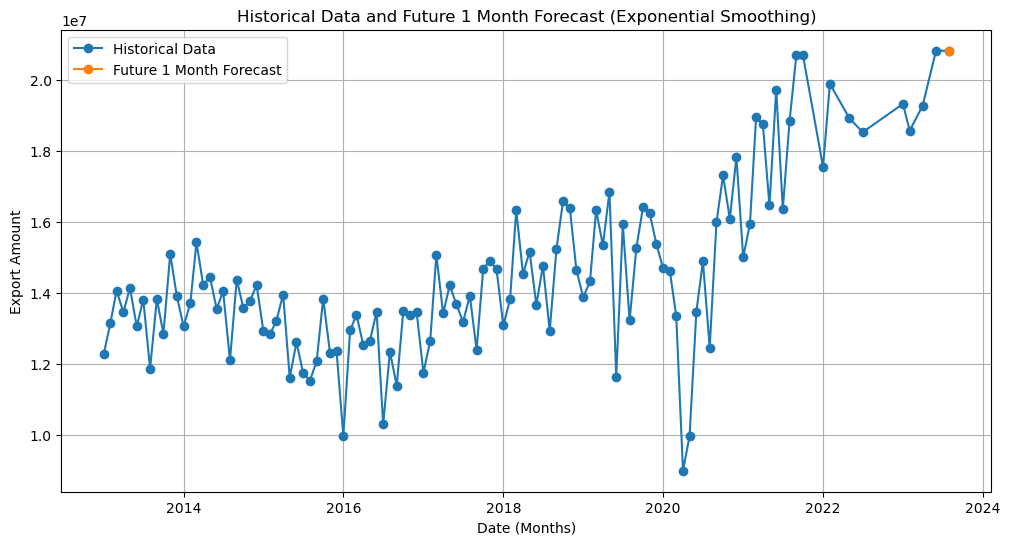

0.6900000000000001
        Date       Export
0 2023-07-31  20837044.75


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.6900000000000001

# Gelecekteki 1 ayın tarih aralığını oluşturun
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date, periods=2, freq='M')[1:]

# Gelecekteki 1 ayın tahminlemelerini üssel düzeltme ile hesaplayın
forecast = [df['Export'].iloc[-1]]  # Mevcut verinin son değeri ile başlayın
for i in range(1, len(future_dates)):
    forecast.append(alpha * df['Export'].iloc[-1] + (1 - alpha) * forecast[-1])

# Gelecekteki 1 ayın tahminlemelerini future_dates ile eşleştirin
future_forecasts_df = pd.DataFrame({'Date': future_dates, 'Export': forecast})

# Tahminlemeleri mevcut veri çerçevesine ekleyerek birleştirin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.plot(df['Date'], df['Export'], label='Historical Data', marker='o')
plt.plot(future_dates, forecast, label='Future 1 Month Forecast', marker='o')
plt.xlabel('Date (Months)')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (Exponential Smoothing)')
plt.legend()
plt.grid(True)
plt.show()

print(alpha)
print(future_forecasts_df)


# SARIMA

In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

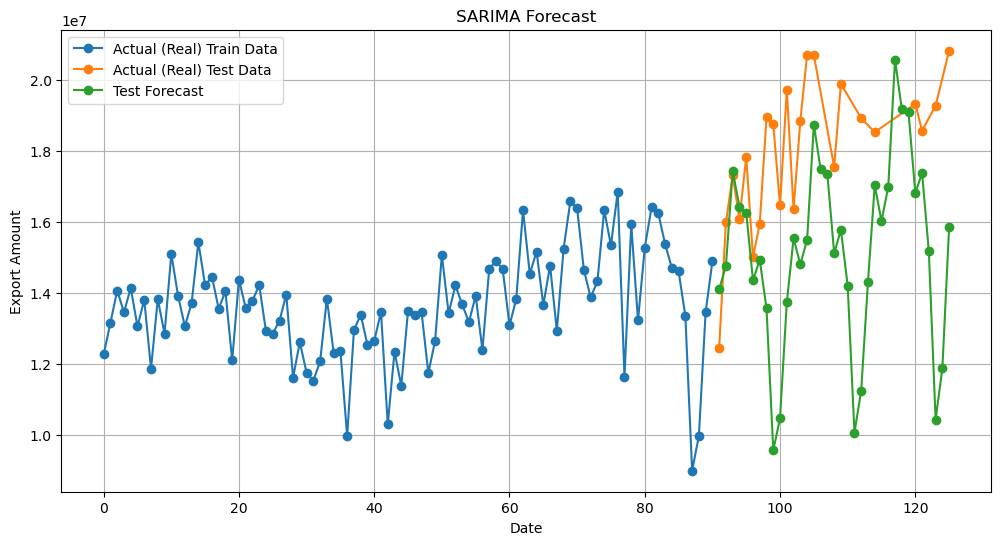

Train Mean Absolute Error (MAE): 2067822.833144257
Train Mean Squared Error (MSE): 12247180328630.336
Train Mean Absolute Percentage Error (MAPE): 0.1573239501511683
Train Root Mean Squared Error (RMSE): 3499597.1666222294
Test Mean Absolute Error (MAE): 3415856.858466162
Test Mean Squared Error (MSE): 19042805169532.254
Test Mean Absolute Percentage Error (MAPE): 0.1832761282060824
Test Root Mean Squared Error (RMSE): 4363806.270852575


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Verileri yükleyin veya oluşturun (örneğin)
# df = pd.read_csv('veri.csv')

# "Date" sütununu tarih veri türüne dönüştürme
#df['Date'] = pd.to_datetime(df['Date'])

# Verileri zaman serisi olarak ayarlama
#df.set_index('Date', inplace=True)

# Verileri eğitim ve test olarak bölmek
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# SARIMA modeli oluşturma ve eğitme
order = (2, 2, 2)  # (p, d, q) parametreleri
seasonal_order = (2, 2, 2, 12)  # (P, D, Q, S) parametreleri

model = SARIMAX(train['Export'], order=order, seasonal_order=seasonal_order)
result = model.fit()

# Train ve test için tahminler yapma
train_predictions = result.predict(start=train.index[0], end=train.index[-1], dynamic=False)
test_predictions = result.predict(start=test.index[0], end=test.index[-1], dynamic=False)

# Grafik çizdirme
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Export'], label='Actual (Real) Train Data', marker='o')
#plt.plot(train_predictions.index, train_predictions, label='Train Forecast', marker='o')
plt.plot(test.index, test['Export'], label='Actual (Real) Test Data', marker='o')
plt.plot(test_predictions.index, test_predictions, label='Test Forecast', marker='o')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Train ve test tahminlerinin doğruluğunu değerlendirme
train_mae = mean_absolute_error(train['Export'], train_predictions)
train_mse = mean_squared_error(train['Export'], train_predictions)
train_mape = np.mean(np.abs((train['Export'] - train_predictions) / train['Export']))
train_rmse = np.sqrt(train_mse)

# Test verileri ile uyumlu hale getirme
test_predictions = test_predictions.loc[test.index]

test_mae = mean_absolute_error(test['Export'], test_predictions)
test_mse = mean_squared_error(test['Export'], test_predictions)
test_mape = np.mean(np.abs((test['Export'] - test_predictions) / test['Export']))
test_rmse = np.sqrt(test_mse)

print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Mean Squared Error (MSE):", train_mse)
print("Train Mean Absolute Percentage Error (MAPE):", train_mape)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Mean Squared Error (MSE):", test_mse)
print("Test Mean Absolute Percentage Error (MAPE):", test_mape)
print("Test Root Mean Squared Error (RMSE):", test_rmse)


In [ ]:
test_predictions

91     1.409938e+07
92     1.476244e+07
93     1.744287e+07
94     1.643470e+07
95     1.626504e+07
96     1.435865e+07
97     1.493189e+07
98     1.356384e+07
99     9.556269e+06
100    1.046235e+07
101    1.372918e+07
102    1.553613e+07
103    1.480644e+07
104    1.548902e+07
105    1.875355e+07
108    1.512176e+07
109    1.577486e+07
112    1.124140e+07
114    1.703686e+07
120    1.681798e+07
121    1.738430e+07
123    1.041881e+07
125    1.586197e+07
Name: predicted_mean, dtype: float64

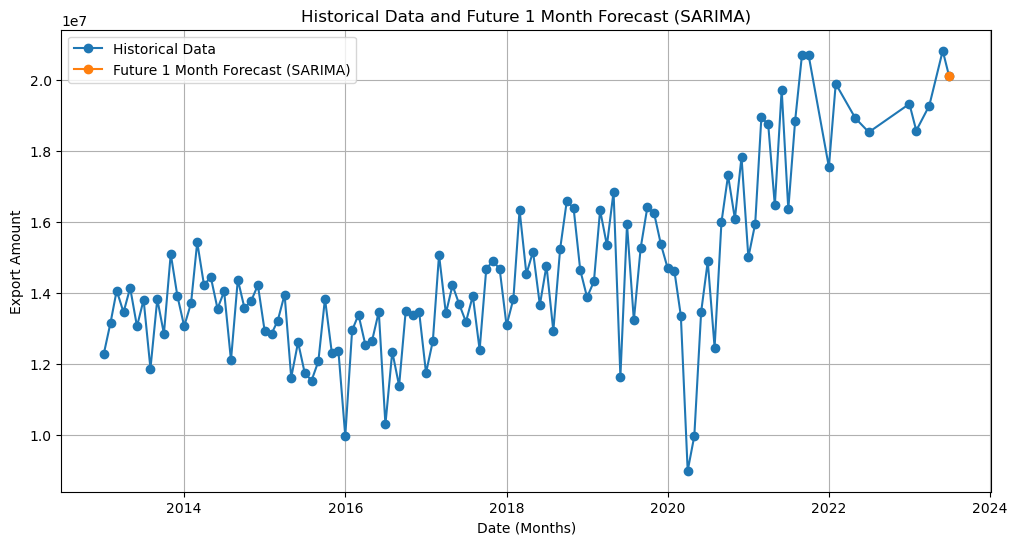

(2, 2, 2)
(2, 2, 2, 12)
          Date        Export
114 2023-06-30  2.011679e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 'Date' sütununu tarih nesnelerine dönüştürün
df['Date'] = pd.to_datetime(df['Date'])

# SARIMA modeli için parametreleri ayarlayın
order = (2, 2, 2)  # (p, d, q) parametreleri
seasonal_order = (2, 2, 2, 12)  # (P, D, Q, S) parametreleri

# SARIMA modelini oluşturun ve uyarlayın
model = sm.tsa.SARIMAX(df['Export'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
forecast = results.get_forecast(steps=forecast_steps)

# Tahminlenmiş değeri alın
forecast_values = forecast.predicted_mean

# Gelecekteki tarihi oluşturun
last_date = df['Date'].max()
future_date = pd.date_range(start=last_date, periods=forecast_steps, freq='M')

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': future_date, 'Export': forecast_values})

# Tahminlemeyi mevcut veri çerçevesine ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.plot(df['Date'], df['Export'], label='Historical Data', marker='o')
plt.plot(future_date, forecast_values, label='Future 1 Month Forecast (SARIMA)', marker='o')
plt.xlabel('Date (Months)')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()

print(order)
print(seasonal_order)
print(future_forecasts_df)


# Holt - Winters

In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

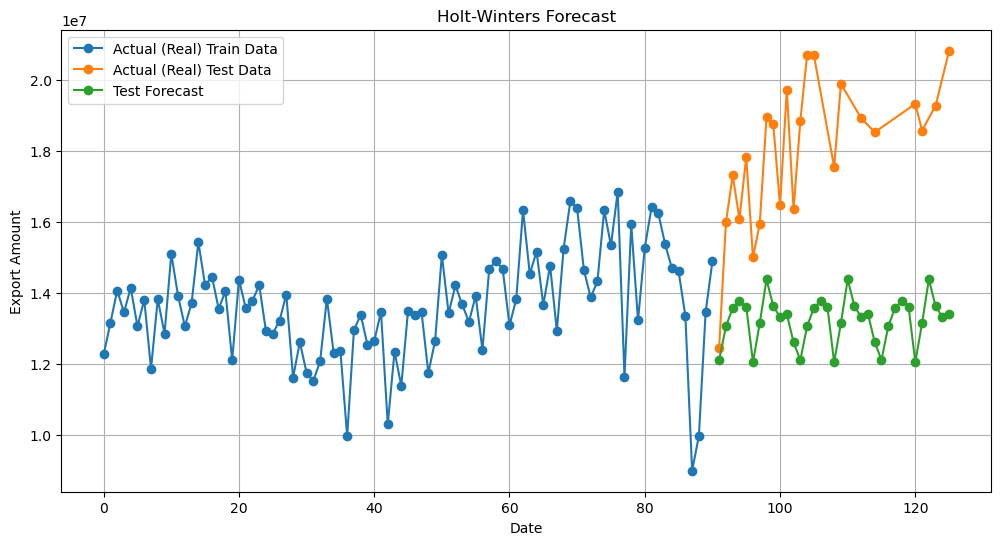

Train Mean Absolute Error (MAE): 862846.4432987185
Train Mean Squared Error (MSE): 1525088633875.105
Train Mean Absolute Percentage Error (MAPE): 0.06695521061696258
Train Root Mean Squared Error (RMSE): 1234944.7898084777
Test Mean Absolute Error (MAE): 4935137.397954511
Test Mean Squared Error (MSE): 27931808590536.566
Test Mean Absolute Percentage Error (MAPE): 0.2653483408870252
Test Root Mean Squared Error (RMSE): 5285055.211682898


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error


# "Date" sütununu tarih veri türüne dönüştürme
#df['Date'] = pd.to_datetime(df['Date'])


# Verileri eğitim ve test olarak bölmek
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Holt-Winters modeli oluşturma ve eğitme
seasonal_periods = 12  # Aylık veri olduğu için
model = ExponentialSmoothing(train['Export'], seasonal='add', seasonal_periods=seasonal_periods)
result = model.fit()

# Train ve test için tahminler yapma
train_predictions = result.predict(start=train.index[0], end=train.index[-1])
test_predictions = result.predict(start=test.index[0], end=test.index[-1])

# Grafik çizdirme
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Export'], label='Actual (Real) Train Data', marker='o')
#plt.plot(train_predictions.index, train_predictions, label='Train Forecast', marker='o')
plt.plot(test.index, test['Export'], label='Actual (Real) Test Data', marker='o')
plt.plot(test_predictions.index, test_predictions, label='Test Forecast', marker='o')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Test tahminlerini sadece test veri kümesi ile uyumlu olan kısmını alın
test_predictions = test_predictions.loc[test.index]

# Train ve test tahminlerinin doğruluğunu değerlendirme
train_mae = mean_absolute_error(train['Export'], train_predictions)
train_mse = mean_squared_error(train['Export'], train_predictions)
train_mape = np.mean(np.abs((train['Export'] - train_predictions) / train['Export']))
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['Export'], test_predictions)
test_mse = mean_squared_error(test['Export'], test_predictions)
test_mape = np.mean(np.abs((test['Export'] - test_predictions) / test['Export']))
test_rmse = np.sqrt(test_mse)

print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Mean Squared Error (MSE):", train_mse)
print("Train Mean Absolute Percentage Error (MAPE):", train_mape)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Mean Squared Error (MSE):", test_mse)
print("Test Mean Absolute Percentage Error (MAPE):", test_mape)
print("Test Root Mean Squared Error (RMSE):", test_rmse)



In [ ]:
test_predictions

91     1.210286e+07
92     1.305368e+07
93     1.357056e+07
94     1.377557e+07
95     1.361163e+07
96     1.204056e+07
97     1.314432e+07
98     1.438038e+07
99     1.362822e+07
100    1.331241e+07
101    1.340106e+07
102    1.260664e+07
103    1.210286e+07
104    1.305368e+07
105    1.357056e+07
108    1.204056e+07
109    1.314432e+07
112    1.331241e+07
114    1.260664e+07
120    1.204056e+07
121    1.314432e+07
123    1.362822e+07
125    1.340106e+07
dtype: float64

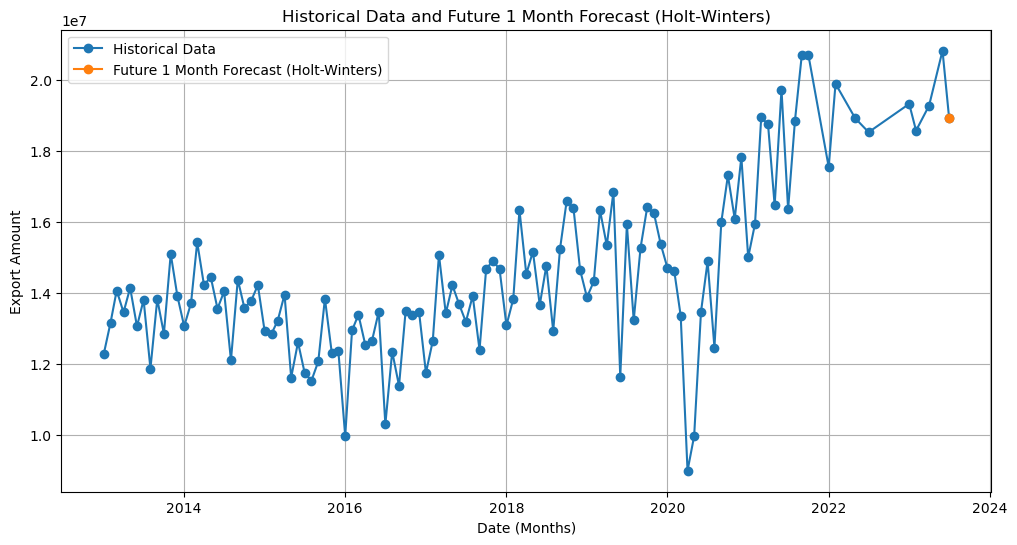

          Date        Export
114 2023-07-01  1.893160e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Holt-Winters modelini oluşturun ve eğitme
seasonal_periods = 12  # Aylık veri olduğu için
model = ExponentialSmoothing(df['Export'], seasonal='add', seasonal_periods=seasonal_periods)
result = model.fit()

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = last_date + pd.DateOffset(months=forecast_steps)  # Gelecekteki tarihi hesaplayın
forecast = result.forecast(steps=forecast_steps)

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': [forecast_date], 'Export': forecast})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')
plt.plot(df['Date'], df['Export'], label='Historical Data', marker='o')
plt.plot([forecast_date], forecast, label='Future 1 Month Forecast (Holt-Winters)', marker='o')
plt.xlabel('Date (Months)')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (Holt-Winters)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)


# LSTM

In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

50 Epochs

Epoch 1/50
91/91 [==============================] - 2s 4ms/step - loss: 0.2772
Epoch 2/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 3/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 4/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 5/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 6/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 7/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 8/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 9/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 10/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 11/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 12/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 13/50
91/91 [==============================

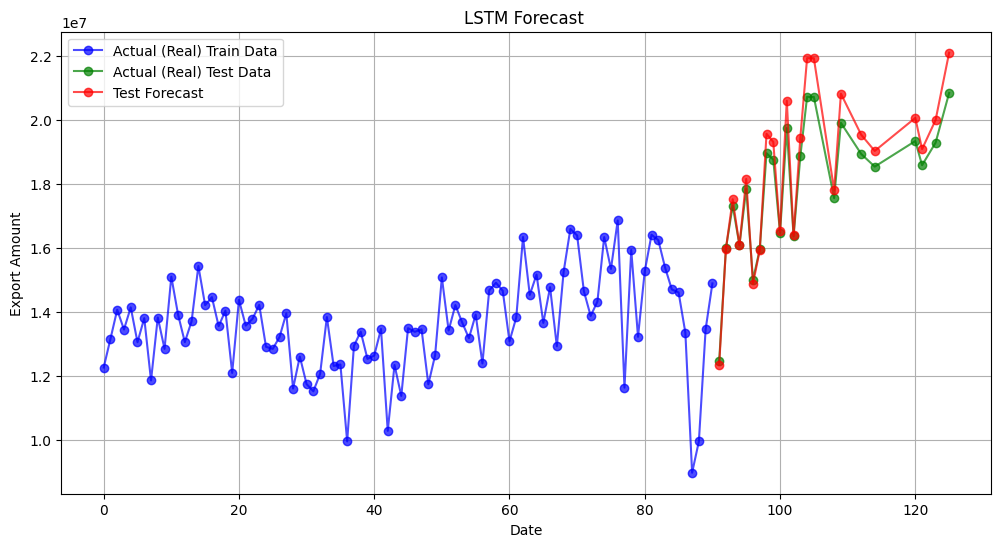

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# LSTM modelini oluşturun ve eğitin
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_lstm_model()
model.fit(train_data_scaled, train_data_scaled, epochs=50, batch_size=1)

# Eğitim verileri için tahminleri yapın
train_data_scaled = train_data_scaled.reshape(-1, 1, 1)
predicted_train_scaled = model.predict(train_data_scaled)
predicted_train_original_scale = scaler.inverse_transform(predicted_train_scaled)

# Eğitim verileri için performans metriklerini hesaplayın
mae_train = mean_absolute_error(train_data, predicted_train_original_scale)
mse_train = mean_squared_error(train_data, predicted_train_original_scale)
mape_train = np.mean(np.abs((train_data - predicted_train_original_scale.ravel()) / train_data))

# Test verileri için tahminleri yapın
test_data_scaled = test_data_scaled.reshape(-1, 1, 1)
predicted_test_scaled = model.predict(test_data_scaled)
predicted_test_original_scale = scaler.inverse_transform(predicted_test_scaled)

# Test verileri için performans metriklerini hesaplayın
mae_test = mean_absolute_error(test_data, predicted_test_original_scale)
mse_test = mean_squared_error(test_data, predicted_test_original_scale)
mape_test = np.mean(np.abs((test_data - predicted_test_original_scale.ravel()) / test_data))

# Sonuçları yazdıralım
print(f'Train Verileri İçin Mean Absolute Error (MAE): {mae_train}')
print(f'Train Verileri İçin Mean Squared Error (MSE): {mse_train}')
print(f'Train Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_train:.2f}')

print(f'Test Verileri İçin Mean Absolute Error (MAE): {mae_test}')
print(f'Test Verileri İçin Mean Squared Error (MSE): {mse_test}')
print(f'Test Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_test:.2f}')

# RMSE hesaplama
rmse_test = np.sqrt(mse_test)

print(f'Test Verileri İçin Root Mean Square Error (RMSE): {rmse_test:.2f}')

from sklearn.metrics import r2_score

# Eğitim verileri için R-squared (R2) hesaplayın
r2_train = r2_score(train_data, predicted_train_original_scale)

# Test verileri için R-squared (R2) hesaplayın
r2_test = r2_score(test_data, predicted_test_original_scale)

# Sonuçları yazdıralım
print(f'Train Verileri İçin R-squared (R2): {r2_train:.2f}')
print(f'Test Verileri İçin R-squared (R2): {r2_test:.2f}')


plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Actual (Real) Train Data', color='blue', marker='o', alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual (Real) Test Data', color='green', marker='o', alpha=0.7)
plt.plot(test_data.index, predicted_test_original_scale, label='Test Forecast', color='red', marker='o', alpha=0.7)


#plt.plot(df['Date'][:train_size], predicted_train_original_scale, label='Eğitim Tahmin Verisi', color='purple', marker='o', alpha=0.7)
plt.title('LSTM Forecast ')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
predicted_test_original_scale

array([[12345200.],
       [15967506.],
       [17516990.],
       [16078547.],
       [18151372.],
       [14880100.],
       [15924249.],
       [19563198.],
       [19307428.],
       [16514650.],
       [20594620.],
       [16386667.],
       [19441062.],
       [21924590.],
       [21922394.],
       [17804906.],
       [20814454.],
       [19532342.],
       [19026434.],
       [20058856.],
       [19083708.],
       [19992664.],
       [22093968.]], dtype=float32)

Epoch 1/50
91/91 [==============================] - 4s 5ms/step - loss: 0.2448
Epoch 2/50
91/91 [==============================] - 1s 6ms/step - loss: 0.0493
Epoch 3/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 4/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 5/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 6/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 7/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 8/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 9/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 10/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 11/50
91/91 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 12/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 13/50
91/91 [==============================

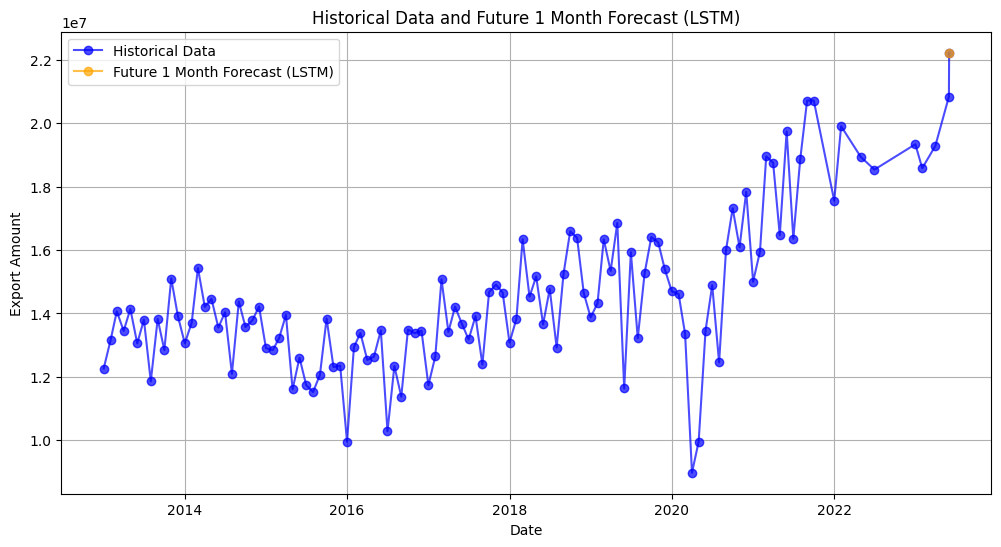

        Date      Export
0 2023-06-02  22222394.0


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# LSTM modelini oluşturun ve eğitin
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_lstm_model()
model.fit(train_data_scaled, train_data_scaled, epochs=50, batch_size=1)

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')  # Gelecekteki tarih aralığını hesaplayın
forecast_input = np.array([df['Export'].iloc[-1]])  # Son bilinen veriyi kullanarak tahmin yapın
forecast_input_scaled = scaler.transform(forecast_input.reshape(-1, 1))
forecast_scaled = model.predict(forecast_input_scaled.reshape(1, 1, 1))
forecast = scaler.inverse_transform(forecast_scaled)

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': forecast_date, 'Export': forecast.ravel()})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Export'], label='Historical Data', color='blue', marker='o', alpha=0.7)
plt.plot(future_forecasts_df['Date'], forecast, label='Future 1 Month Forecast (LSTM)', color='orange', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)


25 Epochs
(Note: For each analysis, the code must be run until the end of outlier detection.)

Epoch 1/25
91/91 [==============================] - 3s 3ms/step - loss: 0.2820
Epoch 2/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0913
Epoch 3/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 4/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 5/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 6/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 7/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 8/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 9/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 10/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 11/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 12/25
91/91 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 13/25
91/91 [==============================

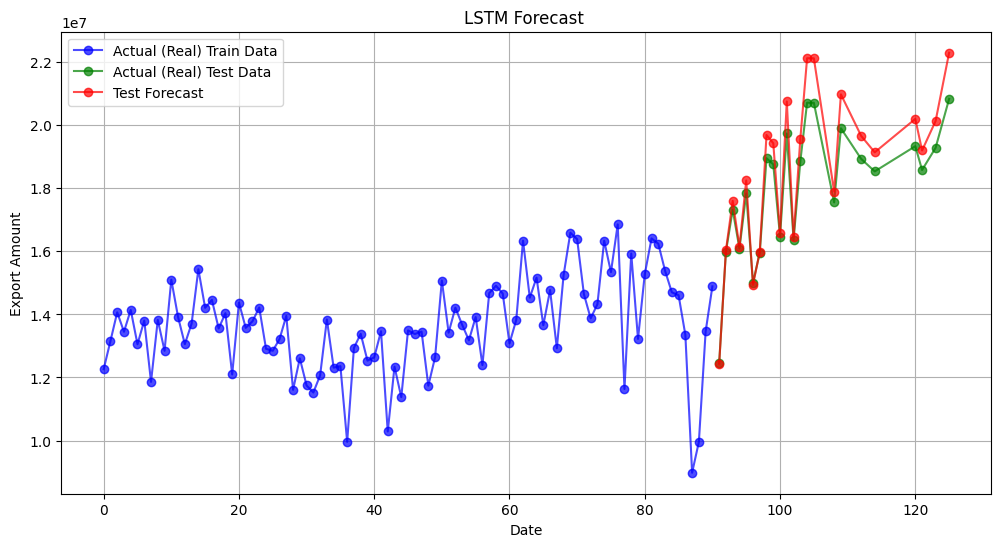

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# LSTM modelini oluşturun ve eğitin
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_lstm_model()
model.fit(train_data_scaled, train_data_scaled, epochs=25, batch_size=1)

# Eğitim verileri için tahminleri yapın
train_data_scaled = train_data_scaled.reshape(-1, 1, 1)
predicted_train_scaled = model.predict(train_data_scaled)
predicted_train_original_scale = scaler.inverse_transform(predicted_train_scaled)

# Eğitim verileri için performans metriklerini hesaplayın
mae_train = mean_absolute_error(train_data, predicted_train_original_scale)
mse_train = mean_squared_error(train_data, predicted_train_original_scale)
mape_train = np.mean(np.abs((train_data - predicted_train_original_scale.ravel()) / train_data))

# Test verileri için tahminleri yapın
test_data_scaled = test_data_scaled.reshape(-1, 1, 1)
predicted_test_scaled = model.predict(test_data_scaled)
predicted_test_original_scale = scaler.inverse_transform(predicted_test_scaled)

# Test verileri için performans metriklerini hesaplayın
mae_test = mean_absolute_error(test_data, predicted_test_original_scale)
mse_test = mean_squared_error(test_data, predicted_test_original_scale)
mape_test = np.mean(np.abs((test_data - predicted_test_original_scale.ravel()) / test_data))

# Sonuçları yazdıralım
print(f'Train Verileri İçin Mean Absolute Error (MAE): {mae_train}')
print(f'Train Verileri İçin Mean Squared Error (MSE): {mse_train}')
print(f'Train Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_train:.2f}')

print(f'Test Verileri İçin Mean Absolute Error (MAE): {mae_test}')
print(f'Test Verileri İçin Mean Squared Error (MSE): {mse_test}')
print(f'Test Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_test:.2f}')

# RMSE hesaplama
rmse_test = np.sqrt(mse_test)

print(f'Test Verileri İçin Root Mean Square Error (RMSE): {rmse_test:.2f}')

from sklearn.metrics import r2_score

# Eğitim verileri için R-squared (R2) hesaplayın
r2_train = r2_score(train_data, predicted_train_original_scale)

# Test verileri için R-squared (R2) hesaplayın
r2_test = r2_score(test_data, predicted_test_original_scale)

# Sonuçları yazdıralım
print(f'Train Verileri İçin R-squared (R2): {r2_train:.2f}')
print(f'Test Verileri İçin R-squared (R2): {r2_test:.2f}')


plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Actual (Real) Train Data', color='blue', marker='o', alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual (Real) Test Data', color='green', marker='o', alpha=0.7)
plt.plot(test_data.index, predicted_test_original_scale, label='Test Forecast', color='red', marker='o', alpha=0.7)


#plt.plot(df['Date'][:train_size], predicted_train_original_scale, label='Eğitim Tahmin Verisi', color='purple', marker='o', alpha=0.7)
plt.title('LSTM Forecast ')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
predicted_test_original_scale

array([[12424893.],
       [16032713.],
       [17602732.],
       [16144973.],
       [18248466.],
       [14937803.],
       [15989003.],
       [19692830.],
       [19430122.],
       [16586593.],
       [20754274.],
       [16456874.],
       [19567356.],
       [22126396.],
       [22124128.],
       [17895600.],
       [20980888.],
       [19661126.],
       [19142028.],
       [20202524.],
       [19200686.],
       [20134414.],
       [22301380.]], dtype=float32)

Epoch 1/25
91/91 [==============================] - 1s 2ms/step - loss: 0.2596
Epoch 2/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 3/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 4/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 5/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 6/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 7/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 8/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 9/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 10/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 11/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 12/25
91/91 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 13/25
91/91 [==============================

1/1 [==============================] - 0s 166ms/step


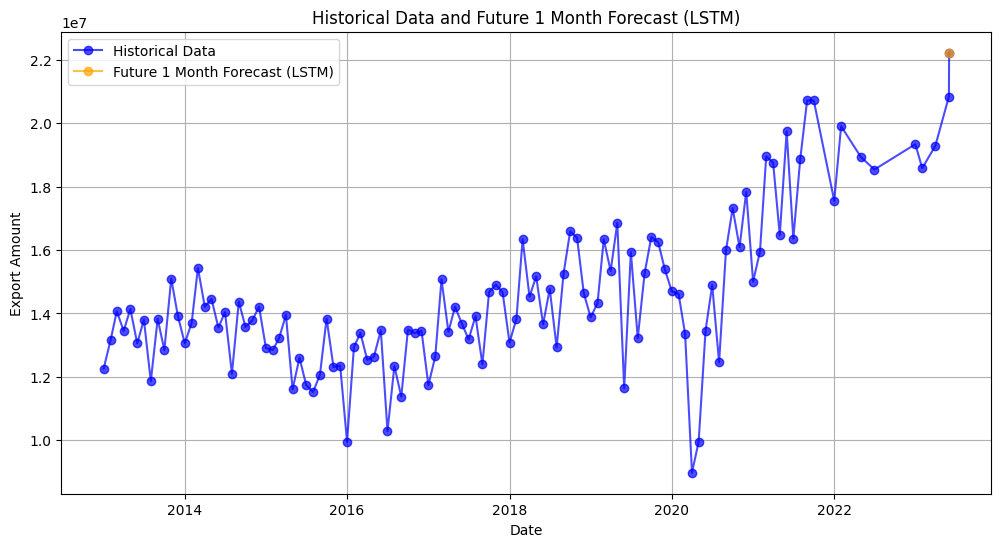

        Date      Export
0 2023-06-02  22220324.0


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# LSTM modelini oluşturun ve eğitin
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_lstm_model()
model.fit(train_data_scaled, train_data_scaled, epochs=25, batch_size=1)

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')  # Gelecekteki tarih aralığını hesaplayın
forecast_input = np.array([df['Export'].iloc[-1]])  # Son bilinen veriyi kullanarak tahmin yapın
forecast_input_scaled = scaler.transform(forecast_input.reshape(-1, 1))
forecast_scaled = model.predict(forecast_input_scaled.reshape(1, 1, 1))
forecast = scaler.inverse_transform(forecast_scaled)

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': forecast_date, 'Export': forecast.ravel()})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Export'], label='Historical Data', color='blue', marker='o', alpha=0.7)
plt.plot(future_forecasts_df['Date'], forecast, label='Future 1 Month Forecast (LSTM)', color='orange', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (LSTM)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)


# MLP

In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

# model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='lbfgs', max_iter=100)

Train Verileri İçin Mean Absolute Error (MAE): 3299.731047398933
Train Verileri İçin Mean Squared Error (MSE): 94439226.17911838
Train Verileri İçin Mean Absolute Percentage Error (MAPE): 0.00
Test Verileri İçin Mean Absolute Error (MAE): 532773.6508493813
Test Verileri İçin Mean Squared Error (MSE): 502375382012.0491
Test Verileri İçin Mean Absolute Percentage Error (MAPE): 0.03
Test Verileri İçin R-squared (R^2) Değeri: 0.877
Test Verileri İçin Root Mean Square Error (RMSE): 708784.440


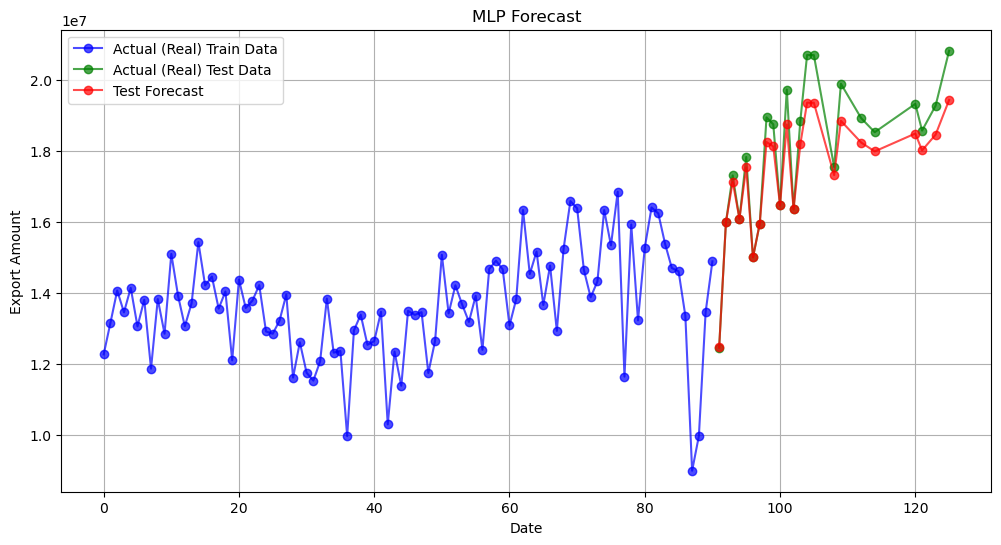

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score  # R-squared ekledik
from sklearn.neural_network import MLPRegressor

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Eğitim verileri için tahminleri yapın
predicted_train_scaled = model.predict(train_data_scaled)
predicted_train_original_scale = scaler.inverse_transform(predicted_train_scaled.reshape(-1, 1))

# Eğitim verileri için performans metriklerini hesaplayın
mae_train = mean_absolute_error(train_data, predicted_train_original_scale)
mse_train = mean_squared_error(train_data, predicted_train_original_scale)
mape_train = np.mean(np.abs((train_data - predicted_train_original_scale.ravel()) / train_data))

# Test verileri için tahminleri yapın
predicted_test_scaled = model.predict(test_data_scaled)
predicted_test_original_scale = scaler.inverse_transform(predicted_test_scaled.reshape(-1, 1))

# Test verileri için performans metriklerini hesaplayın
mae_test = mean_absolute_error(test_data, predicted_test_original_scale)
mse_test = mean_squared_error(test_data, predicted_test_original_scale)
mape_test = np.mean(np.abs((test_data - predicted_test_original_scale.ravel()) / test_data))

# R-squared değerini hesaplayın
r2_test = r2_score(test_data, predicted_test_original_scale)

# RMSE hesaplama
rmse_test = np.sqrt(mse_test)

# Sonuçları yazdırın
print(f'Train Verileri İçin Mean Absolute Error (MAE): {mae_train}')
print(f'Train Verileri İçin Mean Squared Error (MSE): {mse_train}')
print(f'Train Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_train:.2f}')

print(f'Test Verileri İçin Mean Absolute Error (MAE): {mae_test}')
print(f'Test Verileri İçin Mean Squared Error (MSE): {mse_test}')
print(f'Test Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_test:.2f}')

print(f'Test Verileri İçin R-squared (R^2) Değeri: {r2_test:.3f}')  # R-squared değerini ekledik

print(f'Test Verileri İçin Root Mean Square Error (RMSE): {rmse_test:.3f}')

# Tahminleri görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual (Real) Train Data', color='blue', marker='o', alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual (Real) Test Data', color='green', marker='o', alpha=0.7)
plt.plot(test_data.index, predicted_test_original_scale, label='Test Forecast', color='red', marker='o', alpha=0.7)
plt.title('MLP Forecast')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
predicted_test_original_scale

array([[12457893.79394994],
       [15992697.44919099],
       [17139219.90025608],
       [16090594.6928074 ],
       [17542352.97685696],
       [15005706.68089156],
       [15954423.62477657],
       [18259104.90919501],
       [18133626.08913634],
       [16470305.21344109],
       [18754303.74416682],
       [16359645.64111634],
       [18199325.62017266],
       [19369664.25254195],
       [19368667.94935872],
       [17323376.15882805],
       [18857735.58261207],
       [18244026.26943782],
       [17994594.49780985],
       [18499175.40021088],
       [18023025.6700693 ],
       [18467344.79454006],
       [19446325.37144555]])

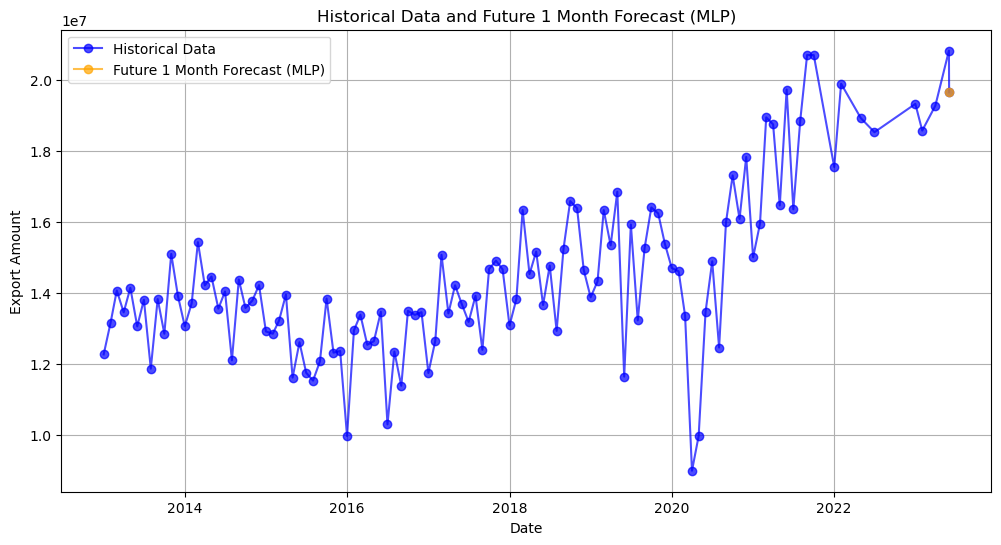

        Date        Export
0 2023-06-02  1.966302e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')  # Gelecekteki tarih aralığını hesaplayın
forecast_input = np.array([df['Export'].iloc[-1]])  # Son bilinen veriyi kullanarak tahmin yapın
forecast_input_scaled = scaler.transform(forecast_input.reshape(-1, 1))
forecast_scaled = model.predict(forecast_input_scaled.reshape(1, 1))
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': forecast_date, 'Export': forecast.ravel()})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Export'], label='Historical Data', color='blue', marker='o', alpha=0.7)
plt.plot(future_forecasts_df['Date'], forecast, label='Future 1 Month Forecast (MLP)', color='orange', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (MLP)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)


In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

# model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', solver='lbfgs', max_iter=100)

Train Verileri İçin Mean Absolute Error (MAE): 21201.37902494086
Train Verileri İçin Mean Squared Error (MSE): 734152072.1335714
Train Verileri İçin Mean Absolute Percentage Error (MAPE): 0.00
Test Verileri İçin Mean Absolute Error (MAE): 454056.51243532595
Test Verileri İçin Mean Squared Error (MSE): 367718782456.64557
Test Verileri İçin Mean Absolute Percentage Error (MAPE): 0.02
Test Verileri İçin R-squared (R^2) Değeri: 0.910
Test Verileri İçin Root Mean Square Error (RMSE): 606398.205


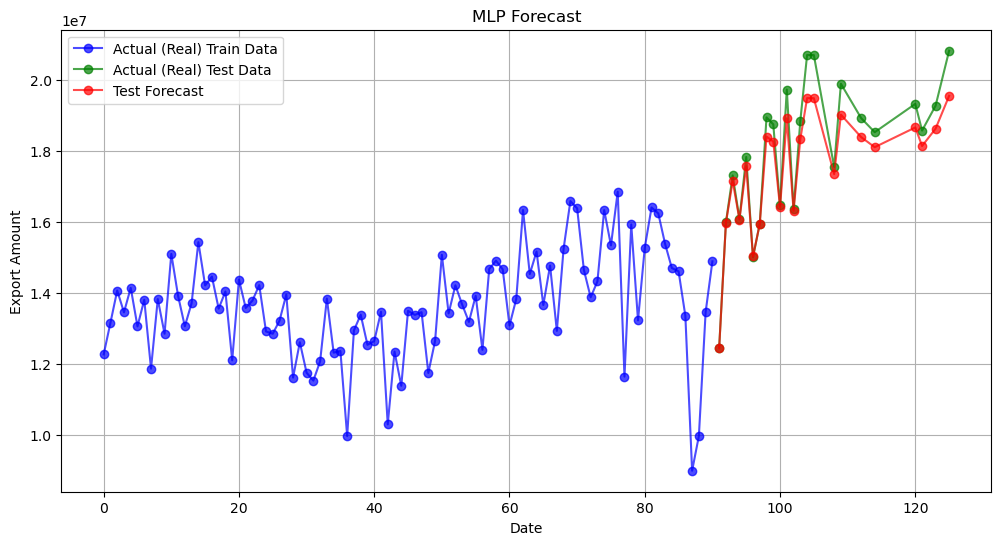

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score  # R-squared ekledik
from sklearn.neural_network import MLPRegressor

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Eğitim verileri için tahminleri yapın
predicted_train_scaled = model.predict(train_data_scaled)
predicted_train_original_scale = scaler.inverse_transform(predicted_train_scaled.reshape(-1, 1))

# Eğitim verileri için performans metriklerini hesaplayın
mae_train = mean_absolute_error(train_data, predicted_train_original_scale)
mse_train = mean_squared_error(train_data, predicted_train_original_scale)
mape_train = np.mean(np.abs((train_data - predicted_train_original_scale.ravel()) / train_data))

# Test verileri için tahminleri yapın
predicted_test_scaled = model.predict(test_data_scaled)
predicted_test_original_scale = scaler.inverse_transform(predicted_test_scaled.reshape(-1, 1))

# Test verileri için performans metriklerini hesaplayın
mae_test = mean_absolute_error(test_data, predicted_test_original_scale)
mse_test = mean_squared_error(test_data, predicted_test_original_scale)
mape_test = np.mean(np.abs((test_data - predicted_test_original_scale.ravel()) / test_data))

# R-squared değerini hesaplayın
r2_test = r2_score(test_data, predicted_test_original_scale)

# RMSE hesaplama
rmse_test = np.sqrt(mse_test)

# Sonuçları yazdırın
print(f'Train Verileri İçin Mean Absolute Error (MAE): {mae_train}')
print(f'Train Verileri İçin Mean Squared Error (MSE): {mse_train}')
print(f'Train Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_train:.2f}')

print(f'Test Verileri İçin Mean Absolute Error (MAE): {mae_test}')
print(f'Test Verileri İçin Mean Squared Error (MSE): {mse_test}')
print(f'Test Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_test:.2f}')

print(f'Test Verileri İçin R-squared (R^2) Değeri: {r2_test:.3f}')  # R-squared değerini ekledik

print(f'Test Verileri İçin Root Mean Square Error (RMSE): {rmse_test:.3f}')

# Tahminleri görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual (Real) Train Data', color='blue', marker='o', alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual (Real) Test Data', color='green', marker='o', alpha=0.7)
plt.plot(test_data.index, predicted_test_original_scale, label='Test Forecast', color='red', marker='o', alpha=0.7)
plt.title('MLP Forecast')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
predicted_test_original_scale

array([[12433264.17486674],
       [15978345.51433755],
       [17154242.50988182],
       [16069501.82011546],
       [17579873.15851476],
       [15028316.23728169],
       [15942540.93041083],
       [18412704.26011969],
       [18272773.05814371],
       [16417023.41192943],
       [18930368.66420398],
       [16316766.18206974],
       [18346481.38061387],
       [19497819.79427811],
       [19496967.34038883],
       [17351573.04186359],
       [19031560.6264331 ],
       [18396076.14422299],
       [18113599.92836464],
       [18670547.90624794],
       [18146502.01732541],
       [18637106.88366868],
       [19562781.52326829]])

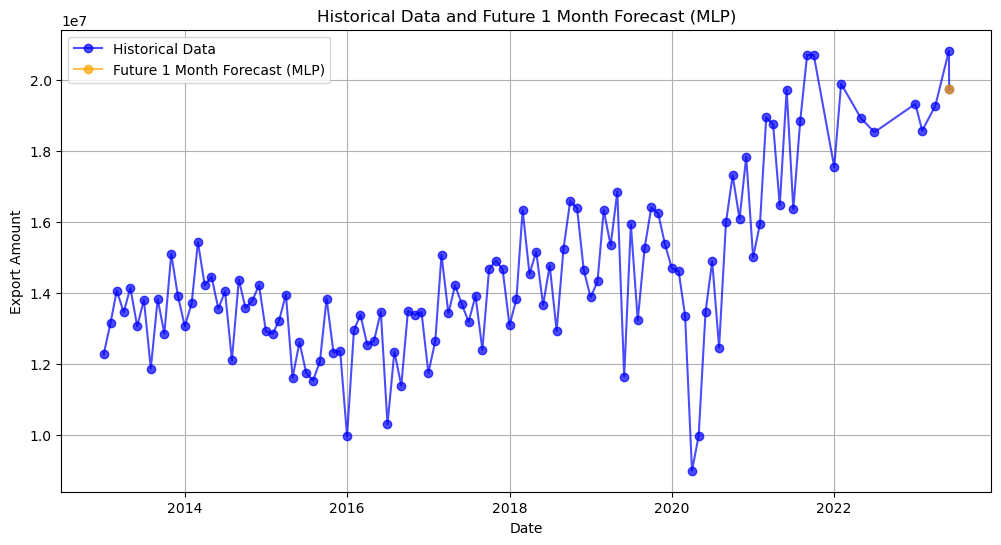

        Date        Export
0 2023-06-02  1.974243e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')  # Gelecekteki tarih aralığını hesaplayın
forecast_input = np.array([df['Export'].iloc[-1]])  # Son bilinen veriyi kullanarak tahmin yapın
forecast_input_scaled = scaler.transform(forecast_input.reshape(-1, 1))
forecast_scaled = model.predict(forecast_input_scaled.reshape(1, 1))
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': forecast_date, 'Export': forecast.ravel()})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Export'], label='Historical Data', color='blue', marker='o', alpha=0.7)
plt.plot(future_forecasts_df['Date'], forecast, label='Future 1 Month Forecast (MLP)', color='orange', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (MLP)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)


In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

#     model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='lbfgs', max_iter=100)

Train Verileri İçin Mean Absolute Error (MAE): 5132.606863905358
Train Verileri İçin Mean Squared Error (MSE): 110505151.68113132
Train Verileri İçin Mean Absolute Percentage Error (MAPE): 0.00
Test Verileri İçin Mean Absolute Error (MAE): 962508.8026372179
Test Verileri İçin Mean Squared Error (MSE): 1667027961122.6875
Test Verileri İçin Mean Absolute Percentage Error (MAPE): 0.05
Test Verileri İçin R-squared (R^2) Değeri: 0.592
Test Verileri İçin Root Mean Square Error (RMSE): 1291134.370


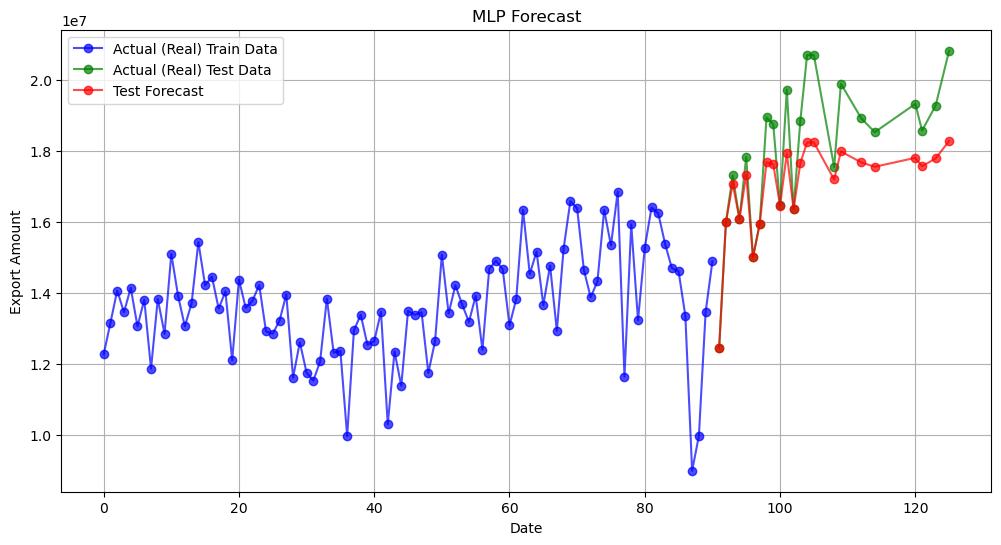

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Eğitim verileri için tahminleri yapın
predicted_train_scaled = model.predict(train_data_scaled)
predicted_train_original_scale = scaler.inverse_transform(predicted_train_scaled.reshape(-1, 1))

# Eğitim verileri için performans metriklerini hesaplayın
mae_train = mean_absolute_error(train_data, predicted_train_original_scale)
mse_train = mean_squared_error(train_data, predicted_train_original_scale)
mape_train = np.mean(np.abs((train_data - predicted_train_original_scale.ravel()) / train_data))

# Test verileri için tahminleri yapın
predicted_test_scaled = model.predict(test_data_scaled)
predicted_test_original_scale = scaler.inverse_transform(predicted_test_scaled.reshape(-1, 1))

# Test verileri için performans metriklerini hesaplayın
mae_test = mean_absolute_error(test_data, predicted_test_original_scale)
mse_test = mean_squared_error(test_data, predicted_test_original_scale)
mape_test = np.mean(np.abs((test_data - predicted_test_original_scale.ravel()) / test_data))

# R-squared değerini hesaplayın
r2_test = r2_score(test_data, predicted_test_original_scale)

# RMSE hesaplama
rmse_test = np.sqrt(mse_test)

# Sonuçları yazdırın
print(f'Train Verileri İçin Mean Absolute Error (MAE): {mae_train}')
print(f'Train Verileri İçin Mean Squared Error (MSE): {mse_train}')
print(f'Train Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_train:.2f}')

print(f'Test Verileri İçin Mean Absolute Error (MAE): {mae_test}')
print(f'Test Verileri İçin Mean Squared Error (MSE): {mse_test}')
print(f'Test Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_test:.2f}')

print(f'Test Verileri İçin R-squared (R^2) Değeri: {r2_test:.3f}')  # R-squared değerini ekledik

print(f'Test Verileri İçin Root Mean Square Error (RMSE): {rmse_test:.3f}')

# Tahminleri görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual (Real) Train Data', color='blue', marker='o', alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual (Real) Test Data', color='green', marker='o', alpha=0.7)
plt.plot(test_data.index, predicted_test_original_scale, label='Test Forecast', color='red', marker='o', alpha=0.7)
plt.title('MLP Forecast')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
predicted_test_original_scale

array([[12449904.92939849],
       [15994876.29915893],
       [17080602.7761339 ],
       [16092833.9572726 ],
       [17338858.08321296],
       [15007276.43760146],
       [15956578.85514324],
       [17692624.50921215],
       [17629737.79020566],
       [16465986.65272106],
       [17940805.27766896],
       [16362050.94271577],
       [17662664.68531997],
       [18249207.94960821],
       [18248708.62838174],
       [17201166.90621003],
       [17992642.62326712],
       [17685067.48738992],
       [17560058.77495283],
       [17812941.59143532],
       [17574307.73856334],
       [17796988.92026984],
       [18287628.50728448]])

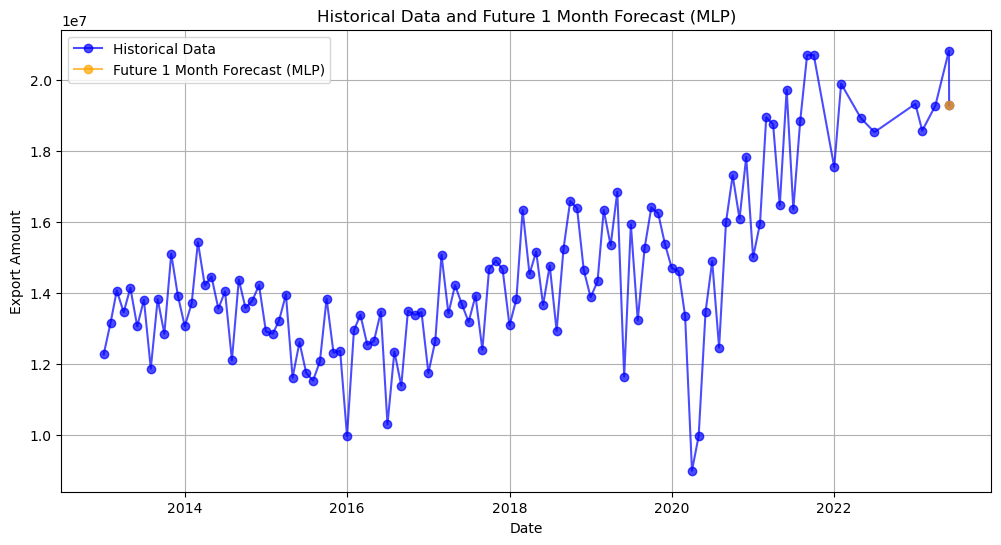

        Date        Export
0 2023-06-02  1.930433e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')  # Gelecekteki tarih aralığını hesaplayın
forecast_input = np.array([df['Export'].iloc[-1]])  # Son bilinen veriyi kullanarak tahmin yapın
forecast_input_scaled = scaler.transform(forecast_input.reshape(-1, 1))
forecast_scaled = model.predict(forecast_input_scaled.reshape(1, 1))
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': forecast_date, 'Export': forecast.ravel()})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Export'], label='Historical Data', color='blue', marker='o', alpha=0.7)
plt.plot(future_forecasts_df['Date'], forecast, label='Future 1 Month Forecast (MLP)', color='orange', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (MLP)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)


In [ ]:
#For each analysis, the code must be run until the end of outlier detection.

# model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='tanh', solver='lbfgs', max_iter=100)

Train Verileri İçin Mean Absolute Error (MAE): 44563.16447672772
Train Verileri İçin Mean Squared Error (MSE): 3803686478.784022
Train Verileri İçin Mean Absolute Percentage Error (MAPE): 0.00
Test Verileri İçin Mean Absolute Error (MAE): 543375.857302772
Test Verileri İçin Mean Squared Error (MSE): 457020305088.23334
Test Verileri İçin Mean Absolute Percentage Error (MAPE): 0.03
Test Verileri İçin R-squared (R^2) Değeri: 0.888
Test Verileri İçin Root Mean Square Error (RMSE): 676032.769


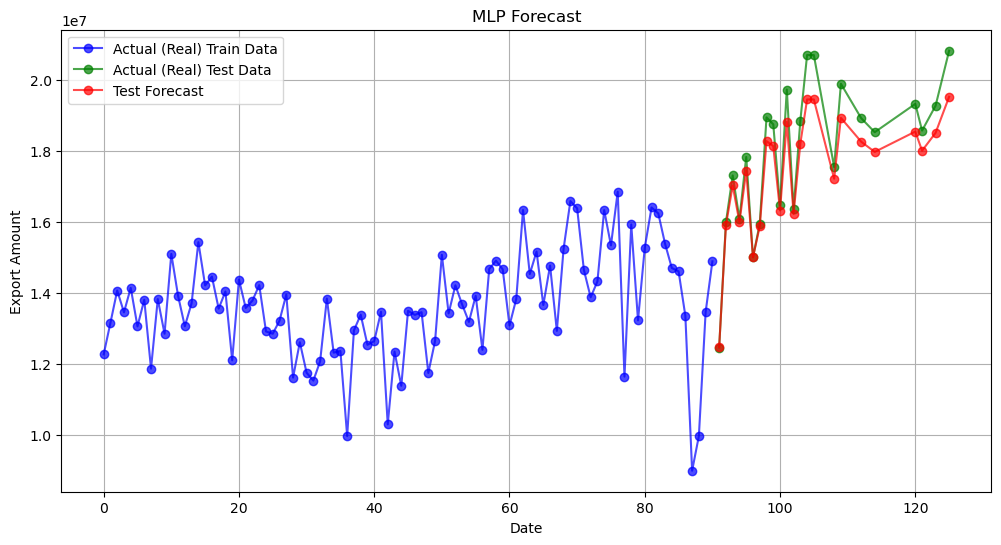

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='tanh', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Eğitim verileri için tahminleri yapın
predicted_train_scaled = model.predict(train_data_scaled)
predicted_train_original_scale = scaler.inverse_transform(predicted_train_scaled.reshape(-1, 1))

# Eğitim verileri için performans metriklerini hesaplayın
mae_train = mean_absolute_error(train_data, predicted_train_original_scale)
mse_train = mean_squared_error(train_data, predicted_train_original_scale)
mape_train = np.mean(np.abs((train_data - predicted_train_original_scale.ravel()) / train_data))

# Test verileri için tahminleri yapın
predicted_test_scaled = model.predict(test_data_scaled)
predicted_test_original_scale = scaler.inverse_transform(predicted_test_scaled.reshape(-1, 1))

# Test verileri için performans metriklerini hesaplayın
mae_test = mean_absolute_error(test_data, predicted_test_original_scale)
mse_test = mean_squared_error(test_data, predicted_test_original_scale)
mape_test = np.mean(np.abs((test_data - predicted_test_original_scale.ravel()) / test_data))

# R-squared değerini hesaplayın
r2_test = r2_score(test_data, predicted_test_original_scale)

# RMSE hesaplama
rmse_test = np.sqrt(mse_test)

# Sonuçları yazdırın
print(f'Train Verileri İçin Mean Absolute Error (MAE): {mae_train}')
print(f'Train Verileri İçin Mean Squared Error (MSE): {mse_train}')
print(f'Train Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_train:.2f}')

print(f'Test Verileri İçin Mean Absolute Error (MAE): {mae_test}')
print(f'Test Verileri İçin Mean Squared Error (MSE): {mse_test}')
print(f'Test Verileri İçin Mean Absolute Percentage Error (MAPE): {mape_test:.2f}')

print(f'Test Verileri İçin R-squared (R^2) Değeri: {r2_test:.3f}')  # R-squared değerini ekledik

print(f'Test Verileri İçin Root Mean Square Error (RMSE): {rmse_test:.3f}')

# Tahminleri görselleştirin
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual (Real) Train Data', color='blue', marker='o', alpha=0.7)
plt.plot(test_data.index, test_data, label='Actual (Real) Test Data', color='green', marker='o', alpha=0.7)
plt.plot(test_data.index, predicted_test_original_scale, label='Test Forecast', color='red', marker='o', alpha=0.7)
plt.title('MLP Forecast')
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
predicted_test_original_scale

array([[12470692.87383409],
       [15908037.3123867 ],
       [17032211.54859592],
       [15994491.92869067],
       [17447663.03109872],
       [15007522.3129004 ],
       [15874093.54232968],
       [18285415.71020832],
       [18141724.68178491],
       [16324781.8590563 ],
       [18830708.6098279 ],
       [16229356.89602549],
       [18217240.36912688],
       [19460916.73406466],
       [19459937.87174424],
       [17224005.51750261],
       [18940265.92251593],
       [18268267.32402833],
       [17979882.23143257],
       [18554088.58534954],
       [18013203.65524584],
       [18518934.93160875],
       [19535839.08614678]])

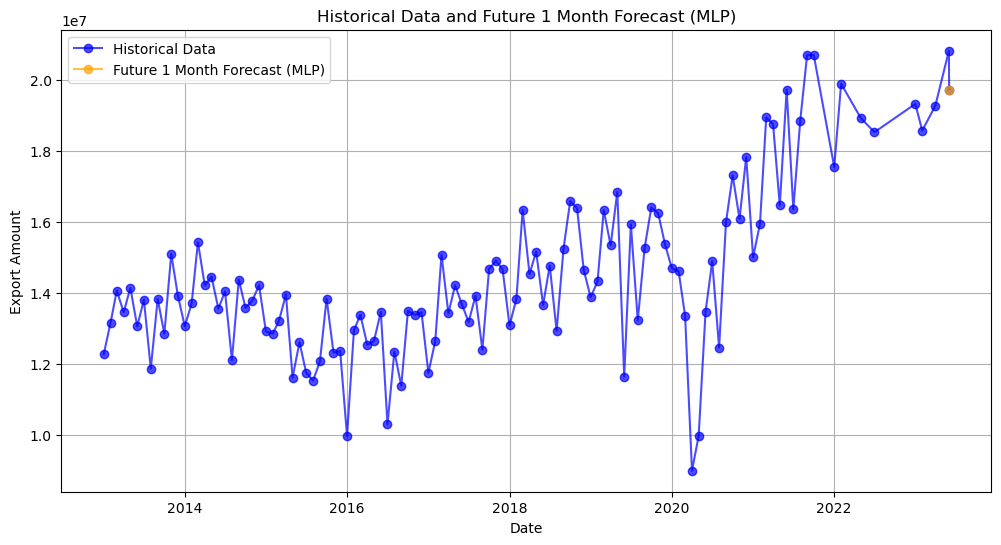

        Date        Export
0 2023-06-02  1.973877e+07


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# "Date" sütununu tarih veri türüne dönüştürme
df['Date'] = pd.to_datetime(df['Date'])

# Veriyi eğitim ve test setlerine bölelim (örneğin %80 eğitim, %20 test)
train_size = int(len(df) * 0.8)
train_data = df['Export'][:train_size]
test_data = df['Export'][train_size:]

# Veriyi yeniden şekillendirin ve ölçeklendirin
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# MLP Regressor modelini oluşturun ve eğitin
def create_mlp_model():
    model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='tanh', solver='lbfgs', max_iter=100)
    return model

model = create_mlp_model()
model.fit(train_data_scaled, train_data_scaled.ravel())

# Gelecekteki 1 ayın tahminlemesini yapın
forecast_steps = 1
last_date = df['Date'].max()  # Eğitim verisinin son tarihi
forecast_date = pd.date_range(start=last_date, periods=forecast_steps+1, closed='right')  # Gelecekteki tarih aralığını hesaplayın
forecast_input = np.array([df['Export'].iloc[-1]])  # Son bilinen veriyi kullanarak tahmin yapın
forecast_input_scaled = scaler.transform(forecast_input.reshape(-1, 1))
forecast_scaled = model.predict(forecast_input_scaled.reshape(1, 1))
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

# Gelecekteki tahminlemeyi bir veri çerçevesine yerleştirin
future_forecasts_df = pd.DataFrame({'Date': forecast_date, 'Export': forecast.ravel()})

# Mevcut veri çerçevesine gelecekteki tahminlemeyi ekleyin
df = pd.concat([df, future_forecasts_df], ignore_index=True)

# Grafik çizme (gelecekteki 1 ay dahil)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Export'], label='Historical Data', color='blue', marker='o', alpha=0.7)
plt.plot(future_forecasts_df['Date'], forecast, label='Future 1 Month Forecast (MLP)', color='orange', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Export Amount')
plt.title('Historical Data and Future 1 Month Forecast (MLP)')
plt.legend()
plt.grid(True)
plt.show()

print(future_forecasts_df)
